In [1]:
import sys
sys.path.append("src")

import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import torchvision as tv
import numpy as np

from PIL import Image

from IPython.display import display
from tqdm.notebook import tqdm

In [2]:
import aegan.aegan as aegan

In [35]:
noise_fn = lambda x: torch.randn((x, 16), device='cpu')
gan = aegan.AEGAN(16, noise_fn, None)

gan.encoder.load_state_dict(torch.load("remote_results/checkpoints/epoch_02249/encoder.pt", map_location="cpu"))
gan.encoder.train(False)
encoder = gan.encoder

In [29]:
transform = tv.transforms.Compose([
#         tv.transforms.Resize((96, 96)),
#         tv.transforms.RandomAffine(0, translate=(5 / 96, 5 / 96), fillcolor=(255, 255, 255)),
#         tv.transforms.ColorJitter(hue=0.5),
#         tv.transforms.RandomHorizontalFlip(p=0.5),
        tv.transforms.ToTensor(),
        tv.transforms.Normalize((0.5, 0.5, 0.5,), (0.5, 0.5, 0.5,))
    ])

folder = ImageFolder("data", transform)

loader = DataLoader(folder,
                    batch_size=1,
                    shuffle=False)

reals = [im for im, _ in loader]

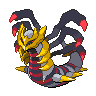

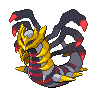

In [30]:
def revert(im):
    im = im[0]
    im -= im.min()
    im /= im.max()
    im = im.numpy().transpose((1, 2, 0))
    im = np.array(im * 255, dtype=np.uint8)
    return im

display(Image.fromarray(revert(reals[9])))
display(Image.open('data/sprites/10007.png.96x96.png'))

In [31]:
display(reals[9].shape)

torch.cat(reals, 0).shape

torch.Size([1, 3, 96, 96])

torch.Size([1175, 3, 96, 96])

In [32]:
with torch.no_grad():
    z_reals = torch.cat([gan.encoder(reals[i]) for i in tqdm(range(len(reals)))]).numpy()
z_reals.shape

  0%|          | 0/1175 [00:00<?, ?it/s]

(1175, 16)

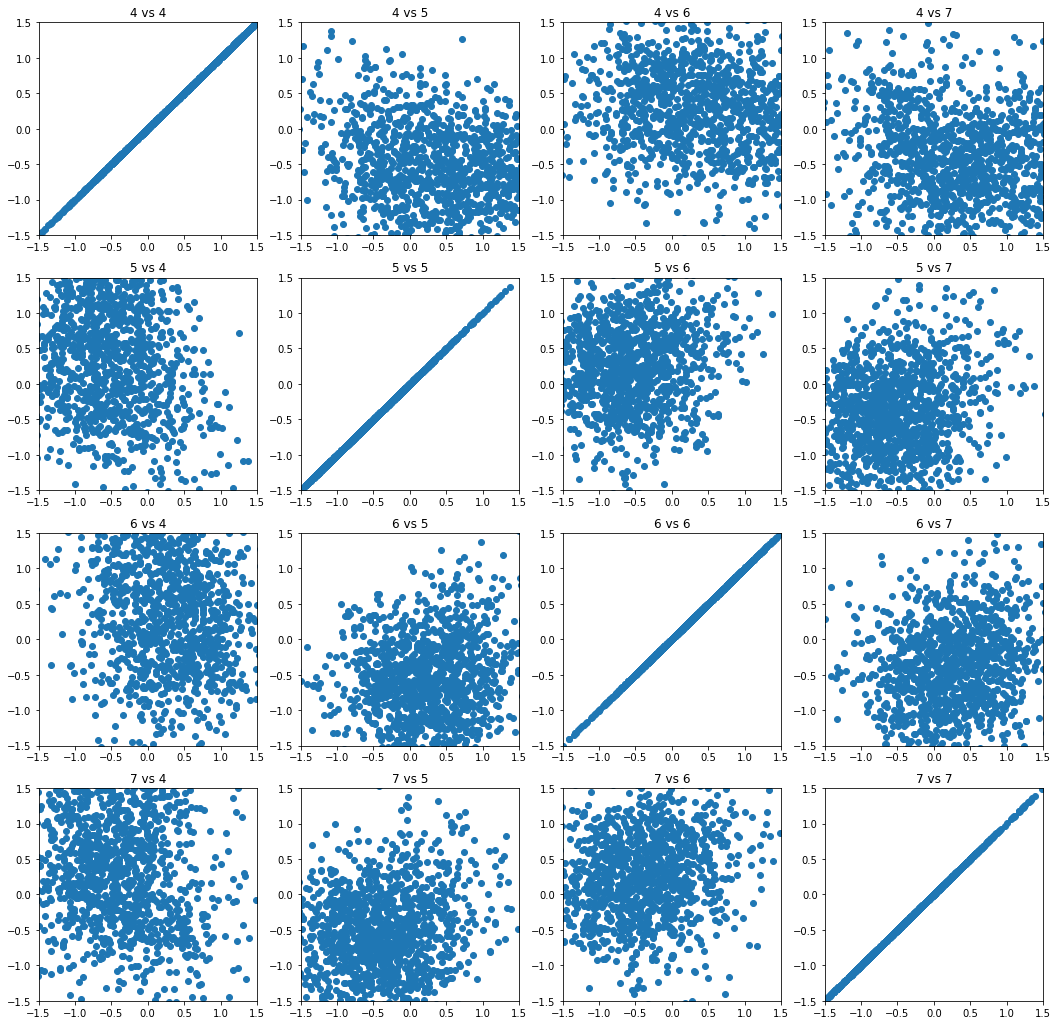

In [33]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ii = i + 4
        jj = j + 4
        ax.scatter(z_reals[:, ii], z_reals[:, jj])
        ax.set_title(f"{ii} vs {jj}")
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        
        
plt.show()

In [36]:
z_fakes = noise_fn(500)

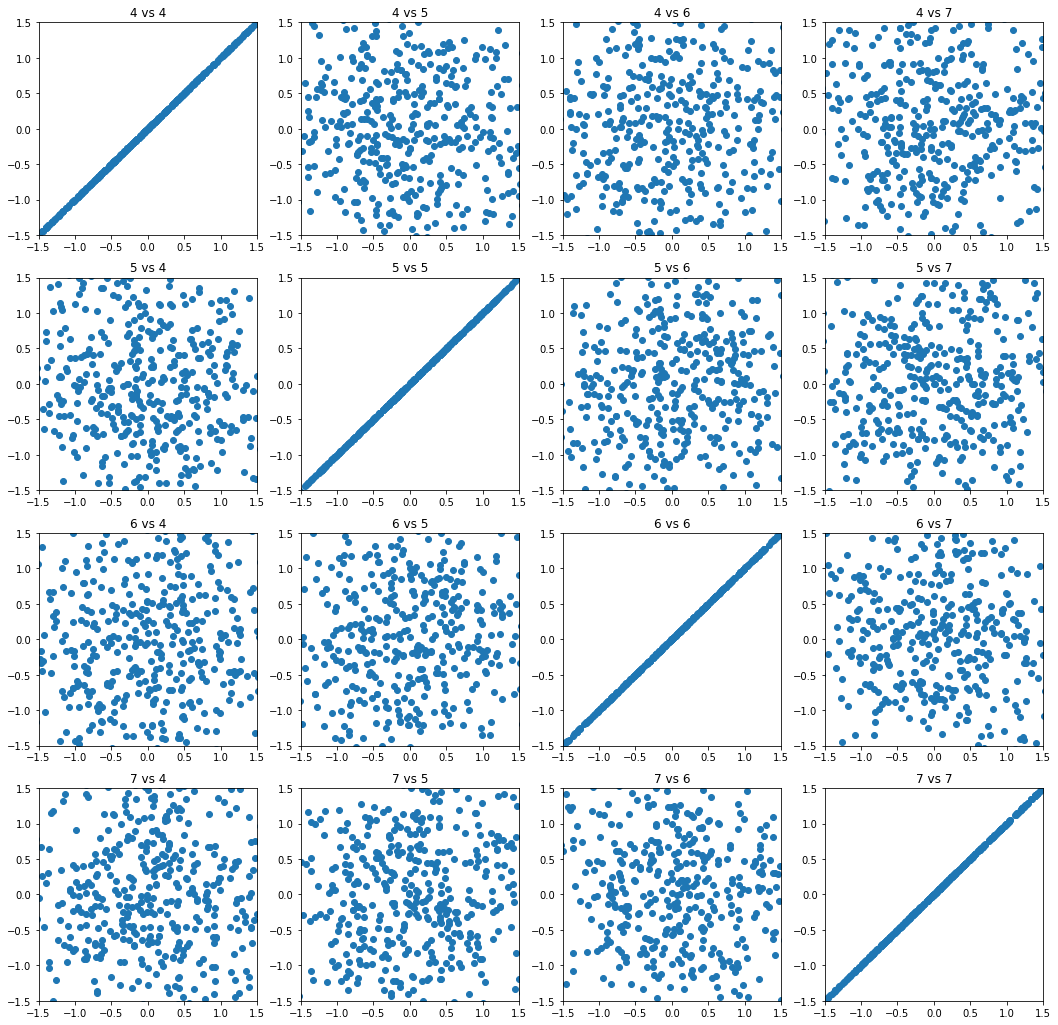

In [37]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ii = i + 4
        jj = j + 4
        ax.scatter(z_fakes[:, ii], z_fakes[:, jj])
        ax.set_title(f"{ii} vs {jj}")
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        
        
plt.show()

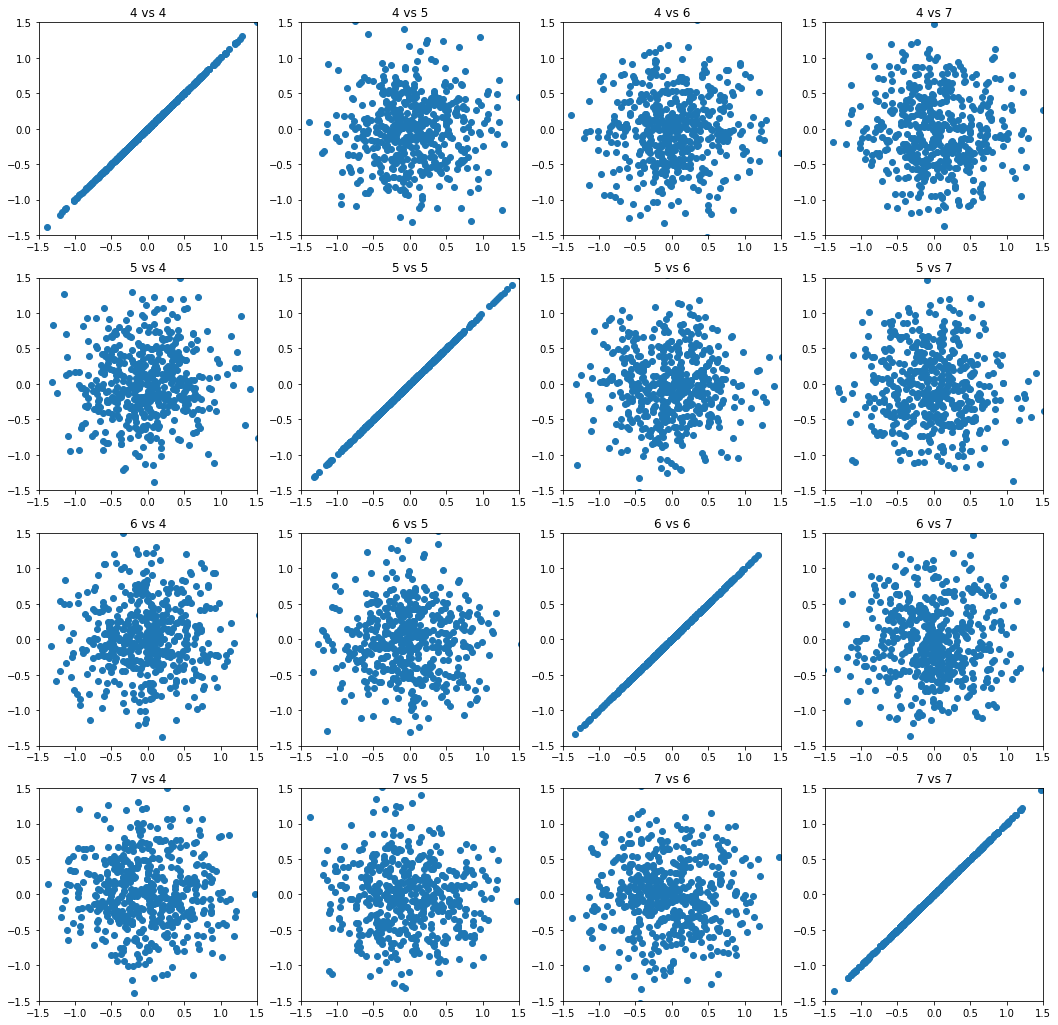

In [44]:
noise_fn_ = lambda x: torch.randn((x, 16), device='cpu') / 2
z_fakes_ = noise_fn_(500)
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ii = i + 4
        jj = j + 4
        ax.scatter(z_fakes_[:, ii], z_fakes_[:, jj])
        ax.set_title(f"{ii} vs {jj}")
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        
        
plt.show()

In [50]:
z_reals.mean(0)

array([-0.36341453,  0.28649548, -0.50662386, -0.08066265,  0.37229598,
       -0.50492626,  0.29137945, -0.36675465, -0.18635796, -0.49227414,
       -0.00392176,  0.0393086 ,  0.5840571 ,  0.02344528,  0.01774351,
        0.5878171 ], dtype=float32)

In [51]:
z_reals.std(0)

array([0.595466  , 0.6783098 , 0.5421904 , 0.63499796, 0.8405784 ,
       0.6095168 , 0.6363683 , 0.6277708 , 0.6897796 , 0.68822044,
       0.6908486 , 0.628307  , 0.89787054, 0.5223974 , 0.6879171 ,
       0.9883713 ], dtype=float32)

In [54]:
gan.generator.load_state_dict(torch.load("remote_results/checkpoints/epoch_02249/generator.pt", map_location="cpu"))
gan.generator.train(False)
gen = gan.generator

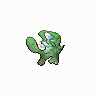

In [69]:
with torch.no_grad():
    s = torch.from_numpy(z_reals[0].reshape(1, 16))
    fake = gen(s)

display(Image.fromarray(revert(fake)))